# Robust Regression / Boston Prices Project

Robust Regression is interested in fitting regression models when data is corrupted given by either outliers or by errors in the model.
The model we are using in this example is RANSAC (Random Sample consensus).

## Ransac
Is an iterative, non deterministic algorithm used for both linear and non linear models.<br />
Only produces reasonable results with certain probability which is dependant on the amount of iterations.<br />
Especially popular in the fields of photogrammetric computer vision.<br />
The algorithm was first published by Fischler and Bolles at SRI International in 1981.<br />
#### Principle:
-On every iteration, 'n' random samples are selected to create a model (where n is the minimum number of points required to create such model, for example you need 2 points to create 2D linear model)<br />
-From the created model, you classify all the points in the dataset as inlier and outliers based on a thresshold, everything further from the model than this thresshold will be considered an outlier, eveything else is inlier.<br />
-After a number of iterations, whichever module produces the less amount of outliers is selected as the final model.<br />
#### Results of learning
Ransac returns a numpy array equal in size to the dataset, where each item is a boolean variable stating whether or not that sample is an inlier or an outlier. It also returns an estimator object which contains both the "coeff" and "intercept" parameters just as the linear regression.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ransac

## Import dataset into a data frame

In [2]:
df=pd.read_csv('housing.data',header=None,sep='\s+')

In [3]:
cNames=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.columns=cNames

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
medV=df['MEDV']
rm=df['RM']
lstat=df['LSTAT']

## Compute the Ransac (Random Sample Consensus) Robust Regression

In [6]:
rmodel=ransac.RANSACRegressor()

In [7]:
X=rm.values.reshape(-1,1)
y=medV.values

In [8]:
rmodel.fit(X=X,y=y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [9]:
print('m= %f\n\rb= %f' %(rmodel.estimator_.coef_,rmodel.estimator_.intercept_))

m= 12.364539
b= -54.300682


### Plot datapoints showing which ones are inlier or outliers according to the Ransac model

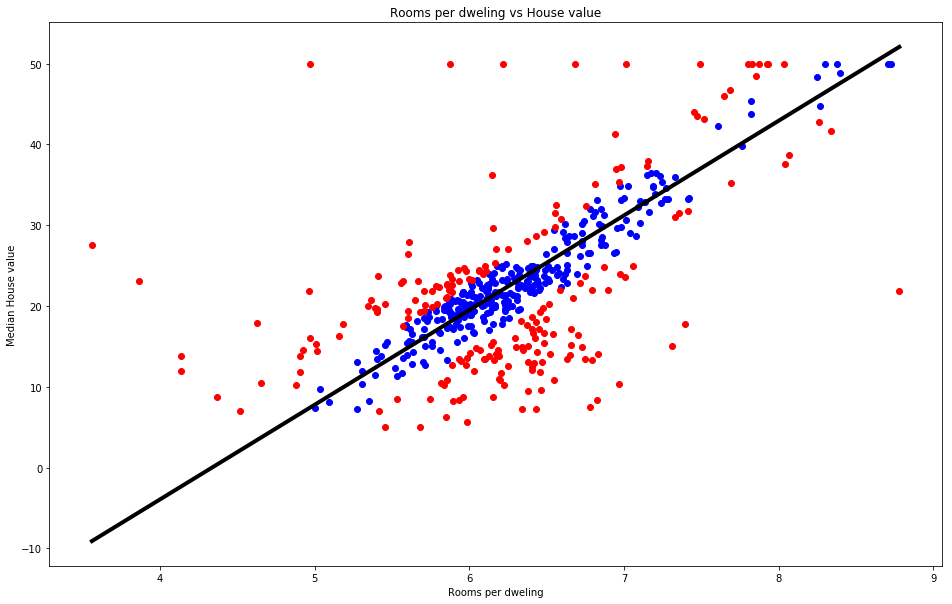

In [49]:
X=rm.values.reshape(-1,1)
y=medV.values
rmodel.fit(X=X,y=y)
inliersX=X[rmodel.inlier_mask_]
inliersy=y[rmodel.inlier_mask_]
outliersX=X[np.logical_not(rmodel.inlier_mask_)]
outliersy=y[np.logical_not(rmodel.inlier_mask_)]
xl=np.linspace(X.min(),X.max(),10)
yl=(rmodel.estimator_.coef_*xl)+rmodel.estimator_.intercept_
plt.figure(figsize=(16,10))
plt.scatter(x=inliersX,y=inliersy,color='b')
plt.scatter(x=outliersX,y=outliersy,color='r')
plt.plot(xl,yl,'k',lw=4)
plt.title('Rooms per dweling vs House value')
plt.xlabel('Rooms per dweling')
plt.ylabel('Median House value')
plt.show()

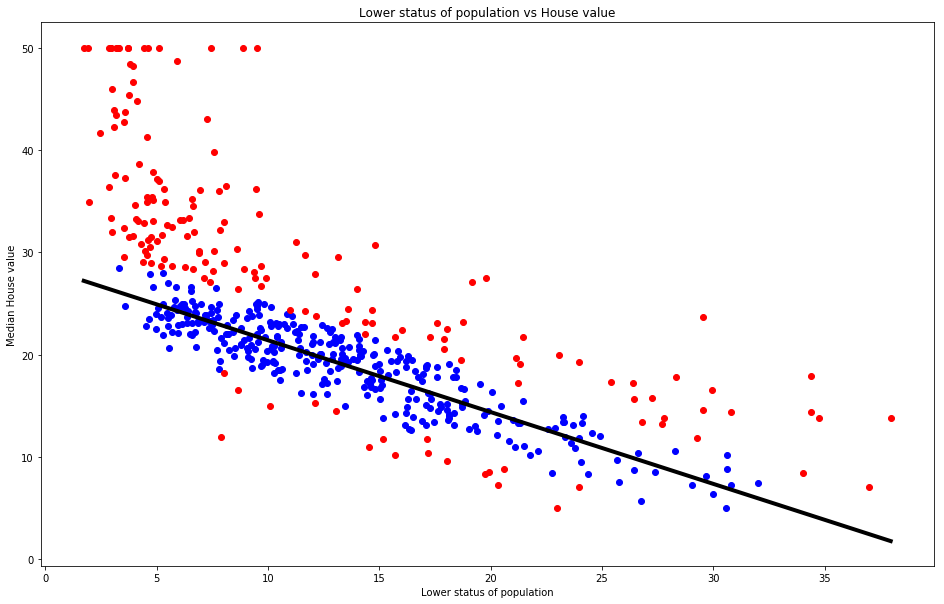

In [50]:
X=lstat.values.reshape(-1,1)
y=medV.values
rmodel.fit(X=X,y=y)
inliersX=X[rmodel.inlier_mask_]
inliersy=y[rmodel.inlier_mask_]
outliersX=X[np.logical_not(rmodel.inlier_mask_)]
outliersy=y[np.logical_not(rmodel.inlier_mask_)]
xl=np.linspace(X.min(),X.max(),10)
yl=(rmodel.estimator_.coef_*xl)+rmodel.estimator_.intercept_
plt.figure(figsize=(16,10))
plt.scatter(x=inliersX,y=inliersy,color='b')
plt.scatter(x=outliersX,y=outliersy,color='r')
plt.plot(xl,yl,'k',lw=4)
plt.title('Lower status of population vs House value')
plt.xlabel('Lower status of population')
plt.ylabel('Median House value')
plt.show()